<a href="https://colab.research.google.com/github/Ledmaoui/Solar_Energy_Forecasting/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparaison of GBM, XGB, ANN, and RNN using real Energy dataset

# 1. Preparation of data  and preprocessing

### 1.1 data importation and columns conversion

In [1]:
import pandas as pd


data = pd.read_csv('energyproduction.csv', delimiter=';')
data.head(5)
data = data.replace(',','.', regex=True)

X = data[data.columns[3:]].astype(float)
y = data[data.columns[1]].astype(float)


In [2]:
data.head(5)

,DATE,ENERGY DAY (KWH),TOTAL ENERGY (MWH),IRRADIATION (kWh/m2 per day),TEMP (C°)
0,01/01/2023,100,0.1,5,19
1,02/01/2023,96,0.196,4.33,18
2,03/01/2023,88,0.284,4,19
3,04/01/2023,101,0.385,6,18
4,05/01/2023,85,0.47,4.96,18


### 1.2 data visulization

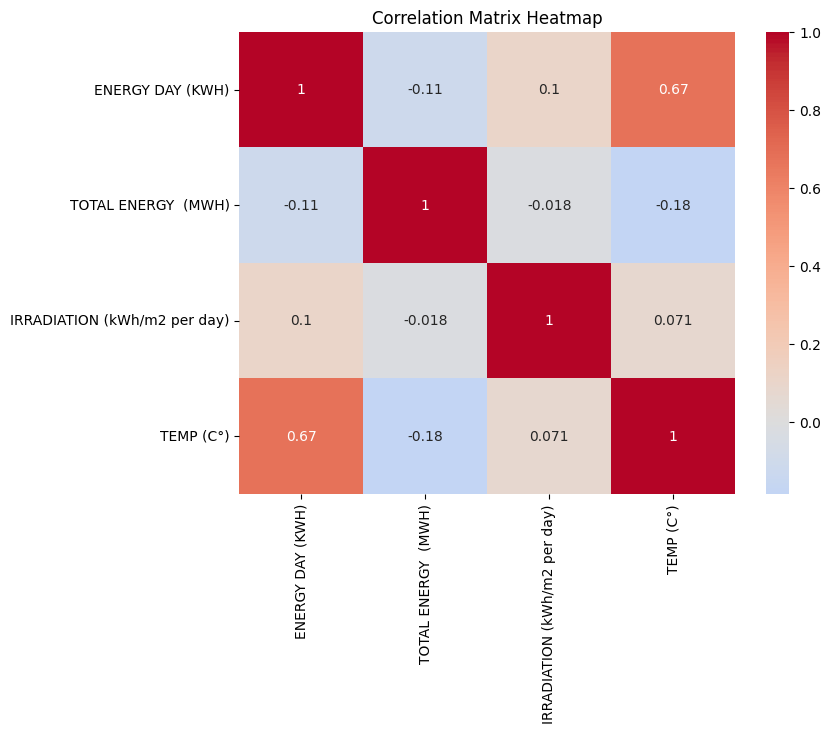

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = data.drop(columns=['DATE'])
df

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 1.3 data scalling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 1.4 data splitting

In [5]:
from sklearn.model_selection import train_test_split

# Splitting
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y,
					test_size = 0.3, random_state = 123)

# 2. Model Training

### 2.1 XGBooST

In [ ]:
# Necessary imports
import numpy as np
import xgboost as xg
from sklearn.metrics import mean_squared_error as RMSE, r2_score as R2, mean_absolute_error as MAE

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
				n_estimators = 20, seed = 123)

# Fitting the model
xgb_r.fit(train_X, train_y)

# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(RMSE(test_y, pred))
r2 = np.sqrt(R2(test_y, pred))
mae = np.sqrt(MAE(test_y, pred))
print(f"Mean Squared Error (MSE) on the test set: {rmse}")
print(f"R-squared Score (R2) on the test set: {r2}")
print(f"Mean Absolute Error (MAE) on the test set: {mae}")


### 2.2 GBM

In [7]:
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.inspection import permutation_importance

params = {
    "n_estimators": 20,
    "learning_rate": 0.01,
    "loss": "squared_error",
}


gbm = ensemble.GradientBoostingRegressor(**params)
gbm.fit(train_X, train_y)

# Predict the model
pred = gbm.predict(test_X)

# RMSE Computation
rmse = np.sqrt(RMSE(test_y, pred))
r2 = np.sqrt(R2(test_y, pred))
mae = np.sqrt(MAE(test_y, pred))
print(f"Mean Squared Error (MSE) on the test set: {rmse}")
print(f"R-squared Score (R2) on the test set: {r2}")
print(f"Mean Absolute Error (MAE) on the test set: {mae}")



Mean Squared Error (MSE) on the test set: 18.897999879196163
R-squared Score (R2) on the test set: 0.3166928117974215
Mean Absolute Error (MAE) on the test set: 3.851917614686697


### 2.3 ANNs

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


# Building the ANN model
model = Sequential()

# Adding input layer and the first hidden layer
model.add(Dense(units=10, activation='relu', input_dim=2))

# Adding the second hidden layer
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=28, activation='relu'))

# Adding the output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compiling the ANN
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Training the ANN model on the Training set train_X, test_X, train_y, test_y
model.fit(train_X, train_y, batch_size=8, epochs=150, verbose=1)

pred = model.predict(test_X)

# RMSE Computation
rmse = np.sqrt(RMSE(test_y, pred))
r2 = np.sqrt(R2(test_y, pred))
mae = np.sqrt(MAE(test_y, pred))
print("RMSE : % f" %(rmse))
print("R2 : % f" %(r2))
print("MAE : % f" %(mae))


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13100.5771 - mean_squared_error: 13100.5771 
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12785.9443 - mean_squared_error: 12785.9443 
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11849.5264 - mean_squared_error: 11849.5264 
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9746.1973 - mean_squared_error: 9746.1973 
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6127.1382 - mean_squared_error: 6127.1382 
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2438.2373 - mean_squared_error: 2438.2373 
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1339.5189 - mean_squared_error: 1339.5189
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 739.0427 - mean_squared_error: 739.0427 
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 910.7579 - mean_squared_error: 910.7579
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 637.0680 - mean_squared_error: 637

### 2.4 RNNs

In [12]:
#train_X, test_X, train_y, test_y
X_train_reshaped = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
X_test_reshaped = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


# Building the RNN model
model = Sequential()

# Adding the LSTM layer
model.add(LSTM(units=7, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Adding the output layer
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Training the RNN model on the Training set
model.fit(X_train_reshaped, train_y, batch_size=4, epochs=100, verbose=1)

# Predicting with the model
pred = model.predict(X_test_reshaped)

# RMSE Computation
rmse = np.sqrt(RMSE(test_y, pred))
r2 = np.sqrt(R2(test_y, pred))
mae = np.sqrt(MAE(test_y, pred))
print(f"Mean Squared Error (MSE) on the test set: {rmse}")
print(f"R-squared Score (R2) on the test set: {r2}")
print(f"Mean Absolute Error (MAE) on the test set: {mae}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 13045.9033 - mean_squared_error: 13045.9033
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13346.5996 - mean_squared_error: 13346.5996
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13504.9639 - mean_squared_error: 13504.9639
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13437.8662 - mean_squared_error: 13437.8662
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13260.9102 - mean_squared_error: 13260.9102
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12522.3193 - mean_squared_error: 12522.3193
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13026.1963 - mean_squared_error: 13026.1963
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12964.9551 - mean_squared_error: 12964.9551
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13081.4365 - mean_squared_error: 13081.4365
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12641.2217 - mean_squared

## Results


Text(0.5, 0.98, 'Energy production in 2023 (KWH)')

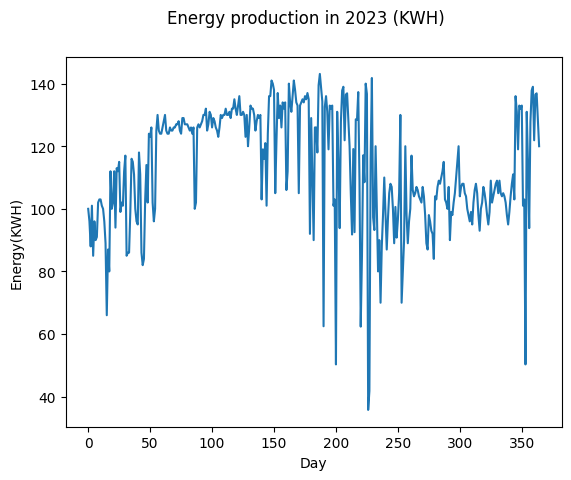

In [18]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.ylabel('Energy(KWH)')
plt.xlabel('Day')
plt.suptitle('Energy production in 2023 (KWH)')

## 3. Comparison between the Four Algorithms

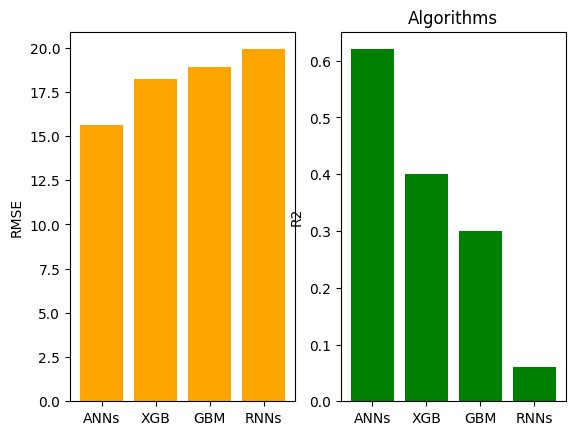

In [27]:
import pandas as pd
from matplotlib import pyplot as plt


df = pd.DataFrame(
   dict(
       x=[ 'XGB','GBM','ANNs','RNNs'],
      rmse=[18.2, 18.9, 15.6, 19.9],
      mae =[3.5, 3.8, 3.3, 3.8],
      r2=[0.4, 0.3, 0.62,0.06]
   )
)

plt.subplot(121)
df_sort= df.sort_values('rmse',ascending=True)
plt.bar('x', 'rmse', data=df_sort, color='orange')
plt.ylabel("RMSE")

plt.subplot(122)
df_sorted = df.sort_values('r2',ascending=False)
plt.bar('x', 'r2', data=df_sorted, color='green')
plt.ylabel("R2")


plt.show()